# 验证曲线

In [1]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# 加载数据
digits = load_digits()
X = digits.data
y = digits.target

print(X.shape)
print(y)

(1797, 64)
[0 1 2 ..., 8 9 8]


In [4]:
#param_range = np.arange(1, 6) / 500.
param_range = np.logspace(-6.5, -2, 10)
print(param_range)

train_scores, val_scores = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range,
    cv=5, scoring='accuracy')

# 在5折的交叉验证数据上进行平均
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

[  3.16227766e-07   1.00000000e-06   3.16227766e-06   1.00000000e-05
   3.16227766e-05   1.00000000e-04   3.16227766e-04   1.00000000e-03
   3.16227766e-03   1.00000000e-02]


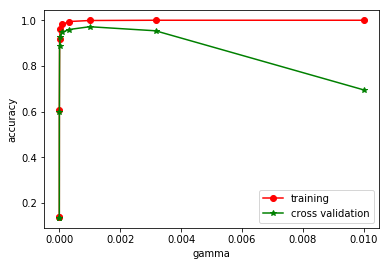

In [5]:
# 绘制学习曲线
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='training')
plt.plot(param_range, val_scores_mean, '*-', color='g', label='cross validation')

plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()